In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
dataset = pd.read_csv('iris_dataset/Iris.csv')
dataset = pd.DataFrame(dataset).drop(["Id"],axis='columns')
dataset["Species"] = dataset["Species"].astype('category').cat.codes
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
model = LogisticRegression()
model.fit(dataset.iloc[:,:4],dataset["Species"])
model.score(dataset.iloc[:,:4],dataset["Species"])

0.9733333333333334

In [4]:
model2  = LinearDiscriminantAnalysis()
model2.fit(dataset.iloc[:,:4],dataset["Species"])
model2.score(dataset.iloc[:,:4],dataset["Species"])

0.98

In [5]:
imbal_data = make_classification(n_samples=1000,n_features=13,n_informative=10,n_classes=2,weights=[0.99,0.01],flip_y=17,class_sep=0.6)
x = pd.DataFrame(imbal_data[0])
y = pd.DataFrame(imbal_data[1])
x= StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


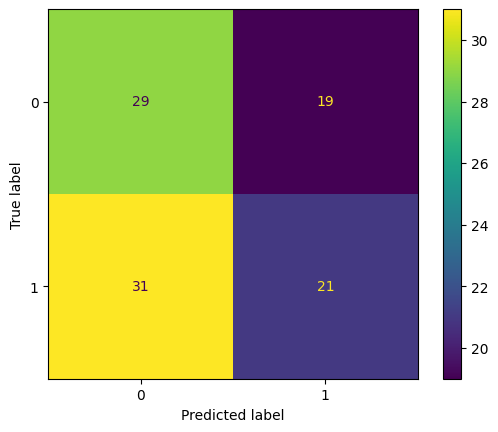

In [6]:
g=GaussianNB()
model3 = g.fit(x_train,y_train)
model3.score(x_train,y_train)
y_pred = model3.predict(x_test)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()


In [7]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.48      0.54        60
           1       0.40      0.53      0.46        40

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.52      0.50      0.50       100



In [13]:
iris_data=dataset.iloc[:,:4]

In [23]:
iris_mean=np.array(iris_data.mean())
iris_mean

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [27]:
pd.DataFrame(cosine_similarity(iris_data.T),index=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.978263,0.948531,0.897346
SepalWidthCm,0.978263,1.000000,0.871867,0.809262
PetalLengthCm,0.948531,0.871867,1.000000,0.983385
PetalWidthCm,0.897346,0.809262,0.983385,1.000000


In [25]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [40]:
mat=(np.random.rand(3,3)*10).round()
print(mat)
print(pd.DataFrame(mat).corr())
cosine_similarity(mat)

[[7. 4. 1.]
 [5. 7. 5.]
 [5. 3. 4.]]
          0        1         2
0  1.000000 -0.27735 -0.970725
1 -0.277350  1.00000  0.500000
2 -0.970725  0.50000  1.000000


array([[1.        , 0.8412389 , 0.88779605],
       [0.8412389 , 1.        , 0.93808315],
       [0.88779605, 0.93808315, 1.        ]])

<AxesSubplot:>

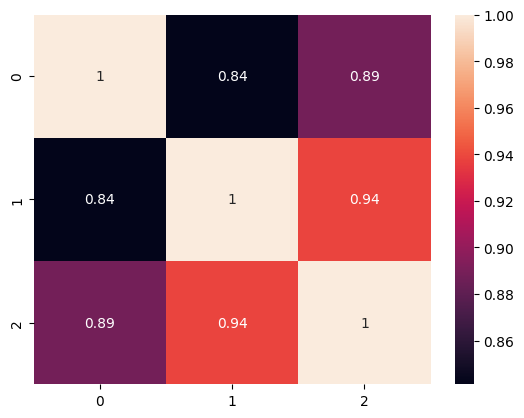

In [52]:
sns.heatmap(cosine_similarity(mat),annot=True)

<AxesSubplot:>

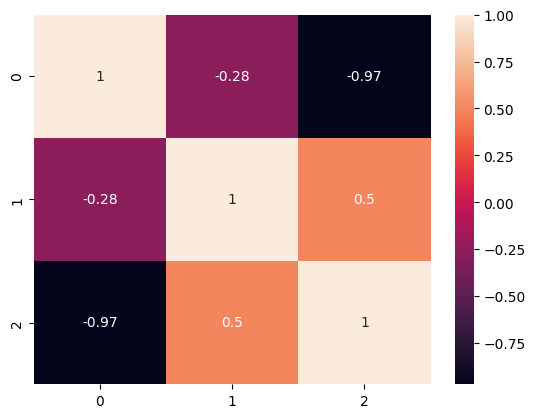

In [42]:
sns.heatmap(pd.DataFrame(mat).corr(),annot=True)